<a href="https://colab.research.google.com/github/Noumzz/RoadTurnsDetection/blob/main/RoadsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:

# Paths to your local dataset
train_dir = "/content/drive/MyDrive/RoadsDetection/train"
val_dir = "/content/drive/MyDrive/RoadsDetection/valid"

# Load and normalize the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  # Increase image size for more detail
    batch_size=None         # No batching, load all images at once
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(256, 256),
    batch_size=None
)

# Add a batch dimension to the dataset
train_ds = train_ds.batch(1)
val_ds = val_ds.batch(1)

# Normalize images by scaling to [0, 1]
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply normalization
train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)


Found 78 files belonging to 5 classes.
Found 24 files belonging to 5 classes.


In [ ]:
# Define data augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    RandomRotation(0.2),                    # Rotate images by up to 20%
    RandomZoom(0.2),                        # Zoom images by up to 20%
])

In [ ]:
# Apply data augmentation to the training set
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# Load the VGG16 model
base_model = VGG16(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers on top
model = Sequential([
    data_augmentation,            # Add data augmentation here as well
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Adjust the output units to match the number of classes
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3060 - loss: 7.8048 - val_accuracy: 0.2917 - val_loss: 6.3432
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.4239 - loss: 4.3314 - val_accuracy: 0.5000 - val_loss: 3.0523
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.4141 - loss: 3.3078 - val_accuracy: 0.5000 - val_loss: 0.8803
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5865 - loss: 1.1737 - val_accuracy: 0.2083 - val_loss: 1.6362
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4749 - loss: 1.3565 - val_accuracy: 0.4583 - val_loss: 0.9826
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5891 - loss: 1.0012 - val_accuracy: 0.5000 - val_loss: 1.4921
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6337 - loss: 0.9501 - val_accuracy: 0.6667 - val_loss: 0.7647
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5919 - loss: 0.9597 - val_accuracy: 0.4167 - val_lo

In [24]:
# Paths to the test dataset
test_dir = "/content/drive/MyDrive/RoadsDetection/test"

# Load and normalize the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=None
)

# Add a batch dimension to the test set
test_ds = test_ds.batch(1)

# Apply normalization
test_ds = test_ds.map(normalize)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 18 files belonging to 5 classes.
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5109 - loss: 1.9355
Test Loss: 1.8249505758285522
Test Accuracy: 0.4444444477558136


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Confusion Matrix:
 [[1 2 0 0 0]
 [0 5 0 0 0]
 [4 1 0 0 0]
 [0 1 0 1 0]
 [0 2 0 0 1]]


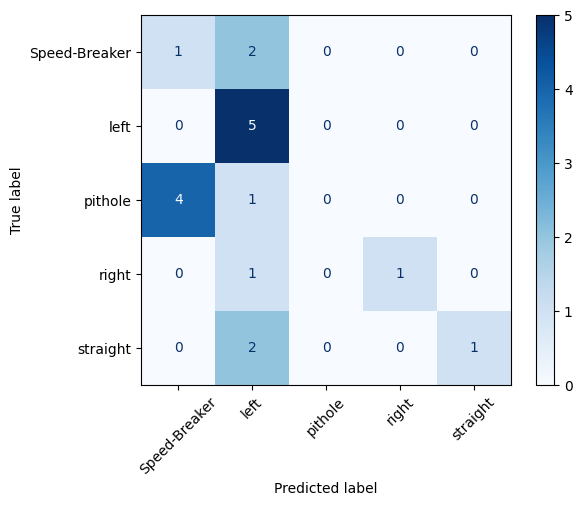

In [30]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to collect true labels and predictions
y_true = []
y_pred = []

# Iterate over the test dataset and get predictions
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted label
    true_labels = labels.numpy()  # Use labels directly without np.argmax if not one-hot encoded

    y_true.extend(true_labels)
    y_pred.extend(predicted_labels)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Define class names in the order retrieved
class_names = ['Speed-Breaker', 'left', 'pithole', 'right', 'straight']

# Generate and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()


In [32]:
# Calculate precision, recall, accuracy, and F1 score
from sklearn.metrics import  ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.4374
Recall: 0.4444
Accuracy: 0.4444
F1 Score: 0.3727


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
